In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [71]:
df=pd.read_csv(r"C:\Users\cancy\Downloads\Student_Productivity_dataset.csv.csv")
df

In [72]:
df=df.drop(columns=["Timestamp"])
df

In [4]:
import re
def extract_avg(value):
    value = str(value)
    value = value.replace(",", "")   # remove commas
    value = value.replace("+", "")   # remove plus sign
    
    nums = re.findall(r'\d+', value)  # extract numbers
    nums = [float(n) for n in nums]
    
    if len(nums) == 0:
        return None
    if len(nums) == 1:
        return nums[0]
    return sum(nums) / len(nums)

In [73]:
df["Sleep Hours (Last Night)"] = df["Sleep Hours (Last Night)"].apply(extract_avg)
df["Steps Walked Today(Approx)"] = df["Steps Walked Today(Approx)"].apply(extract_avg)
df["Water Intake(Glasses)"] = df["Water Intake(Glasses)"].apply(extract_avg)
df["Total Screen Time (Hours Today)"] = df["Total Screen Time (Hours Today)"].apply(extract_avg)
df["Work/Study Hours Today (So far)"] = df["Work/Study Hours Today (So far)"].apply(extract_avg)


In [7]:
def convert_outside_time(value):
    value = str(value).lower()
    value = value.replace(",", "").replace("+", "")
    
    nums = re.findall(r'\d+', value)
    nums = [float(n) for n in nums]
    
    if len(nums) == 0:
        return None
    
    avg = sum(nums) / len(nums)
    
    if "min" in value:
        return avg / 60   # convert minutes to hours
    
    return avg   # already in hours


In [8]:
df["Time Spent Outside Today"] = df["Time Spent Outside Today"].apply(convert_outside_time)
df.head()

In [9]:
def convert_social(value):
    value = str(value).lower()
    nums = re.findall(r'\d+', value)
    nums = [float(n) for n in nums]

    if len(nums) == 0:
        return None
    
    avg = sum(nums) / len(nums)

    if "min" in value:
        return avg / 60   # convert minutes → hours
    
    return avg   # already in hours

In [10]:
df["Social Media Usage Today"] = df["Social Media Usage Today"].apply(convert_social)

In [11]:
def convert_wakeup(value):
    value = str(value).lower()
    value = value.replace("am", "").strip()
    
    # Special case: "After 9 AM"
    if "after" in value:
        return 9.5
    
    nums = re.findall(r'\d+', value)
    nums = [float(n) for n in nums]
    
    if len(nums) == 1:
        return nums[0]
    
    return sum(nums) / len(nums)

In [12]:
df["Wake-up Time"] = df["Wake-up Time"].apply(convert_wakeup)

In [13]:
df.head()

,AGE,Gender,Sleep Hours (Last Night),Sleep Quality,Wake-up Time,Breakfast,Steps Walked Today(Approx),Water Intake(Glasses),Exercise Today,Caffeine Intake,Total Screen Time (Hours Today),Social Media Usage Today,Stress Level (1-10),Mood Level Right Now(1-10),Energy Level Right Now(1-10),Work/Study Hours Today (So far),Time Spent Outside Today,Weather (Your Area Today),Completed your goal today?
0,18-20,Male,5.5,4,6.5,No,10000.0,5.5,"Yes, intense (45+ min)",1 cup,5.0,0.75,3,7,8,2.0,0.75,Pleasant,Yes
1,21-23,Male,6.5,4,5.5,Yes,9000.0,8.0,No,3 cups,3.0,0.25,4,8,8,5.0,1.50,Cold,Yes
2,21-23,Female,5.5,4,7.5,Yes,3500.0,5.5,"Yes, light (0-20 min)",0 cups,5.0,1.50,4,7,7,3.0,1.50,Cold,Yes
3,18-20,Male,5.5,3,7.5,No,1000.0,1.0,"Yes, medium (20-45 min)",0 cups,7.0,1.50,3,5,5,3.0,0.75,Cold,No
4,18-20,Male,5.5,4,6.5,Yes,6500.0,8.0,"Yes, intense (45+ min)",0 cups,3.0,0.75,7,5,9,3.0,1.50,Pleasant,Yes


In [14]:
from sklearn.preprocessing import LabelEncoder

cat_cols = [
    "AGE",
    "Gender",                  #M-1 , F-0
    "Breakfast",               #No-0, Yes-1
    "Exercise Today",          
    "Weather (Your Area Today)",    ##cold = 0 , Pleasent=1
    'Completed your goal today?  '  #yes - 1 , No - 0
    
]

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [15]:
df["Sleep Quality"] = df["Sleep Quality"].astype(str).str.extract(r'(\d+)').astype(float)

df["Caffeine Intake"] = df["Caffeine Intake"].str.extract(r"(\d+)").astype(float) # for 1 cup=1.0 
                                                                                  # for 3 cup=3.0


In [16]:
df.head()

,AGE,Gender,Sleep Hours (Last Night),Sleep Quality,Wake-up Time,Breakfast,Steps Walked Today(Approx),Water Intake(Glasses),Exercise Today,Caffeine Intake,Total Screen Time (Hours Today),Social Media Usage Today,Stress Level (1-10),Mood Level Right Now(1-10),Energy Level Right Now(1-10),Work/Study Hours Today (So far),Time Spent Outside Today,Weather (Your Area Today),Completed your goal today?
0,0,1,5.5,4.0,6.5,0,10000.0,5.5,1,1.0,5.0,0.75,3,7,8,2.0,0.75,3,1
1,1,1,6.5,4.0,5.5,1,9000.0,8.0,0,3.0,3.0,0.25,4,8,8,5.0,1.50,0,1
2,1,0,5.5,4.0,7.5,1,3500.0,5.5,2,0.0,5.0,1.50,4,7,7,3.0,1.50,0,1
3,0,1,5.5,3.0,7.5,0,1000.0,1.0,3,0.0,7.0,1.50,3,5,5,3.0,0.75,0,0
4,0,1,5.5,4.0,6.5,1,6500.0,8.0,1,0.0,3.0,0.75,7,5,9,3.0,1.50,3,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   AGE                              101 non-null    int64  
 1   Gender                           101 non-null    int64  
 2   Sleep Hours (Last Night)         101 non-null    float64
 3   Sleep Quality                    101 non-null    float64
 4   Wake-up Time                     101 non-null    float64
 5   Breakfast                        101 non-null    int64  
 6   Steps Walked Today(Approx)       101 non-null    float64
 7   Water Intake(Glasses)            101 non-null    float64
 8   Exercise Today                   101 non-null    int64  
 9   Caffeine Intake                  101 non-null    float64
 10  Total Screen Time (Hours Today)  101 non-null    float64
 11  Social Media Usage Today         101 non-null    float64
 12  Stress Level (1-10)   

In [18]:
df.columns = df.columns.str.strip()


In [19]:
print(df.columns.tolist())


['AGE', 'Gender', 'Sleep Hours (Last Night)', 'Sleep Quality', 'Wake-up Time', 'Breakfast', 'Steps Walked Today(Approx)', 'Water Intake(Glasses)', 'Exercise Today', 'Caffeine Intake', 'Total Screen Time (Hours Today)', 'Social Media Usage Today', 'Stress Level (1-10)', 'Mood Level Right Now(1-10)', 'Energy Level Right Now(1-10)', 'Work/Study Hours Today (So far)', 'Time Spent Outside Today', 'Weather (Your Area Today)', 'Completed your goal today?']


In [20]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
print(numeric_cols)


['AGE', 'Gender', 'Sleep Hours (Last Night)', 'Sleep Quality', 'Wake-up Time', 'Breakfast', 'Steps Walked Today(Approx)', 'Water Intake(Glasses)', 'Exercise Today', 'Caffeine Intake', 'Total Screen Time (Hours Today)', 'Social Media Usage Today', 'Stress Level (1-10)', 'Mood Level Right Now(1-10)', 'Energy Level Right Now(1-10)', 'Work/Study Hours Today (So far)', 'Time Spent Outside Today', 'Weather (Your Area Today)', 'Completed your goal today?']


In [21]:
df["Productivity_Score"] = (
      df["Completed your goal today?"] * 3
    + df["Mood Level Right Now(1-10)"] * 2
    + df["Energy Level Right Now(1-10)"] * 2
    + df["Work/Study Hours Today (So far)"]
    + df["Sleep Quality"]
    + df["Exercise Today"]
    - df["Stress Level (1-10)"]
    - df["Total Screen Time (Hours Today)"] * 0.5
)



In [22]:
df[["Productivity_Score"]].head()




,Productivity_Score
0,34.5
1,38.5
2,33.5
3,22.5
4,30.5


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

important_cols = [
    "Sleep Hours (Last Night)",
    "Stress Level (1-10)",
    "Mood Level Right Now(1-10)",
    "Energy Level Right Now(1-10)",
    "Total Screen Time (Hours Today)",
    "Social Media Usage Today",
    "Steps Walked Today(Approx)",
    "Work/Study Hours Today (So far)"
]

outlier_report = {}

for col in important_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_report[col] = len(outliers)

outlier_report


{'Sleep Hours (Last Night)': 0,
 'Stress Level (1-10)': 0,
 'Mood Level Right Now(1-10)': 4,
 'Energy Level Right Now(1-10)': 0,
 'Total Screen Time (Hours Today)': 0,
 'Social Media Usage Today': 13,
 'Steps Walked Today(Approx)': 0,
 'Work/Study Hours Today (So far)': 25}

In [24]:
import os
os.makedirs("charts", exist_ok=True)


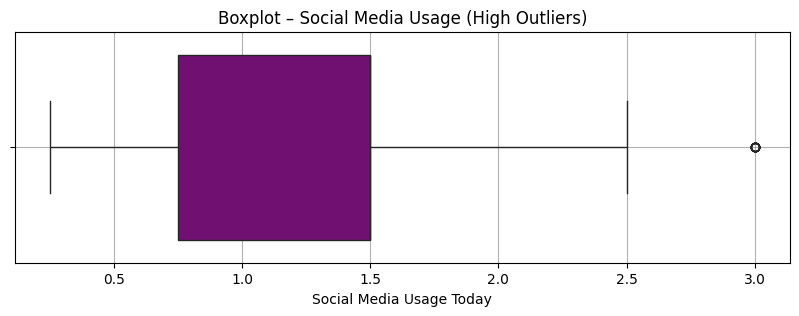

In [25]:
## BOx plot 
plt.figure(figsize=(10,3))
sns.boxplot(x=df["Social Media Usage Today"], color='purple')
plt.title("Boxplot – Social Media Usage (High Outliers)")
plt.grid(True)
plt.savefig("charts/your_filename.png")

plt.show()



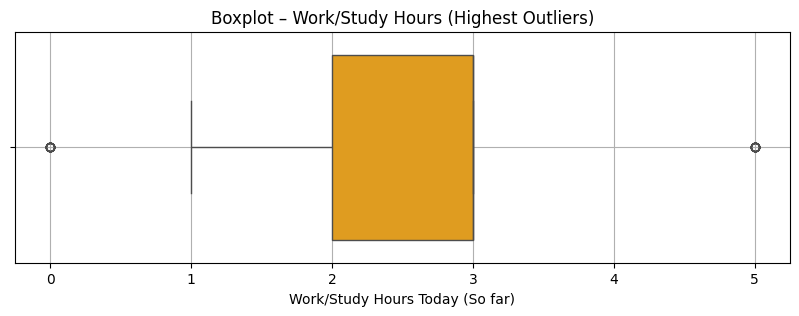

In [26]:
plt.figure(figsize=(10,3))
sns.boxplot(x=df["Work/Study Hours Today (So far)"], color='orange')
plt.title("Boxplot – Work/Study Hours (Highest Outliers)")
plt.grid(True)
plt.savefig("charts/your_filename.png")

plt.show()



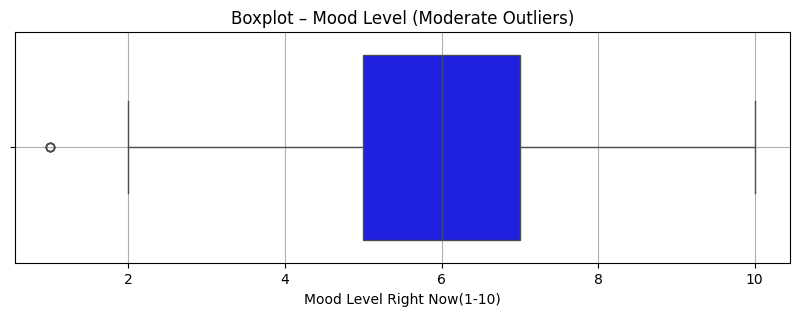

In [27]:
plt.figure(figsize=(10,3))
sns.boxplot(x=df["Mood Level Right Now(1-10)"], color='blue')
plt.title("Boxplot – Mood Level (Moderate Outliers)")
plt.grid(True)
plt.savefig("charts/your_filename.png")

plt.show()


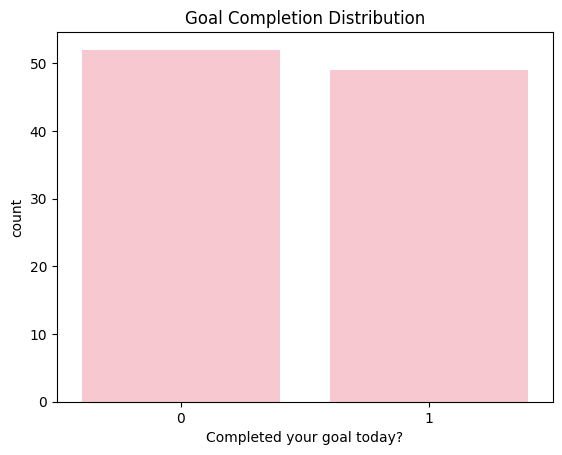

In [28]:
## Bar Chart 
sns.countplot(x=df["Completed your goal today?"],color='pink')  
plt.title("Goal Completion Distribution")
plt.savefig("charts/your_filename.png")

plt.show()


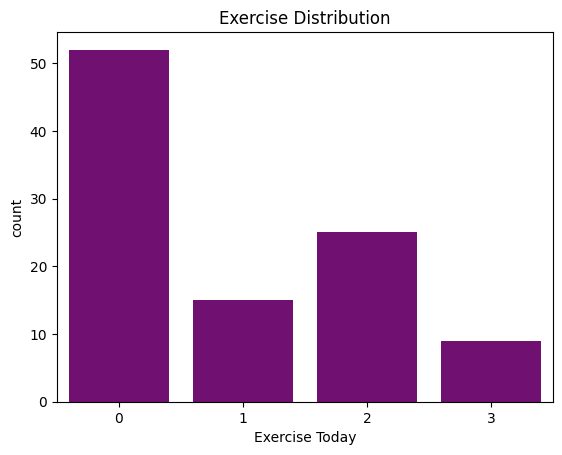

In [29]:
sns.countplot(x=df["Exercise Today"],color='purple')
plt.title("Exercise Distribution")
plt.savefig("charts/your_filename.png")

plt.show()


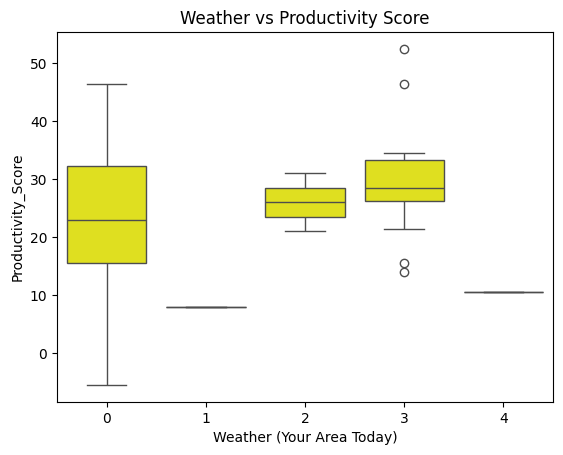

In [30]:
sns.boxplot(x=df["Weather (Your Area Today)"], 
            y=df["Productivity_Score"], color='yellow')
plt.title("Weather vs Productivity Score")
plt.savefig("charts/your_filename.png")

plt.show()


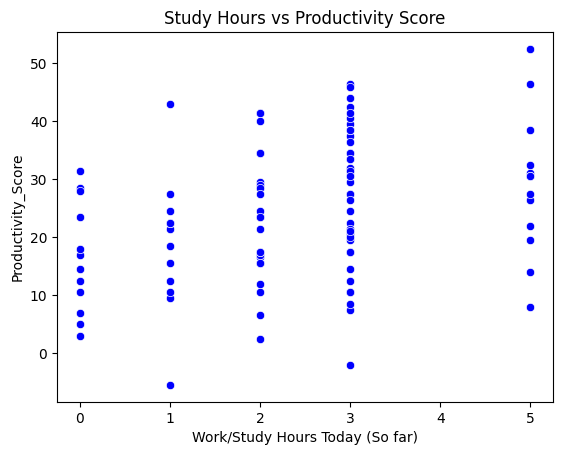

In [31]:
sns.scatterplot(x=df["Work/Study Hours Today (So far)"],
                y=df["Productivity_Score"], color='blue')
plt.title("Study Hours vs Productivity Score")
plt.savefig("charts/your_filename.png")

plt.show()


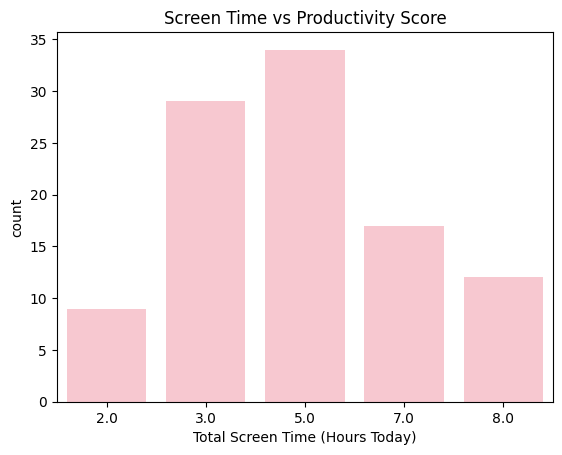

In [32]:
sns.countplot(x=df["Total Screen Time (Hours Today)"], color='pink')
plt.title("Screen Time vs Productivity Score")
plt.savefig("charts/your_filename.png")

plt.show()


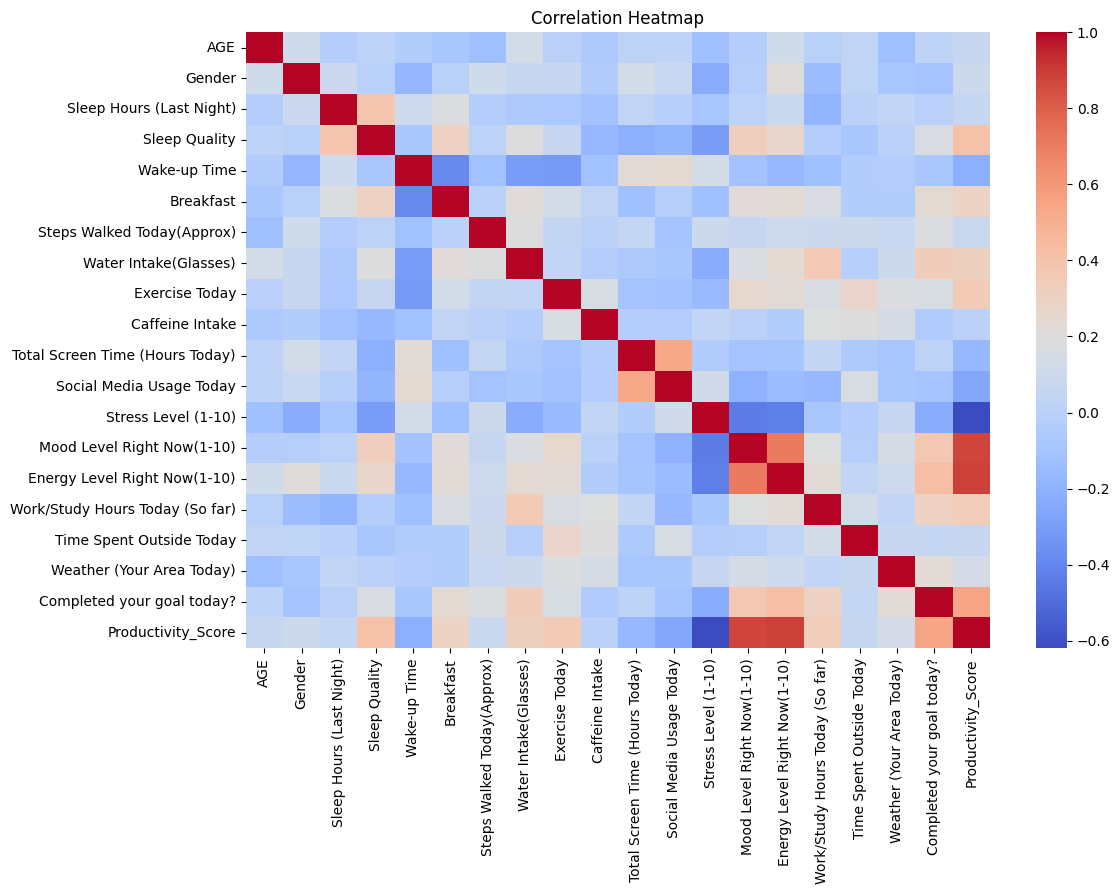

In [33]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.savefig("charts/your_filename.png")

plt.show()


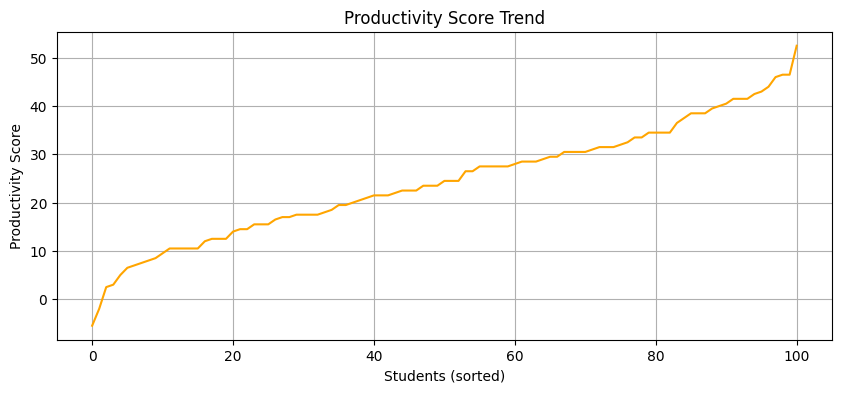

In [34]:
df_sorted = df.sort_values("Productivity_Score")

plt.figure(figsize=(10,4))
plt.plot(df_sorted["Productivity_Score"].values, color='orange')
plt.title("Productivity Score Trend")
plt.xlabel("Students (sorted)")
plt.ylabel("Productivity Score")
plt.grid(True)
plt.savefig("charts/your_filename.png")

plt.show()


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix,mean_absolute_error, mean_squared_error

 

In [51]:
feature_cols = [
    "Sleep Hours (Last Night)",
    "Sleep Quality",
    "Caffeine Intake",
    "Exercise Today",
    "Total Screen Time (Hours Today)",
    "Stress Level (1-10)",
    "Mood Level Right Now(1-10)",
    "Energy Level Right Now(1-10)",
    "Work/Study Hours Today (So far)",
    "Social Media Usage Today",
    "Water Intake(Glasses)",
    "Steps Walked Today(Approx)"
   
]

In [52]:
x=df[feature_cols]
y=df["Productivity_Score"]

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [54]:
from sklearn.preprocessing import StandardScaler


In [55]:

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [56]:
linear = LinearRegression()
linear.fit(x_train_scaled, y_train)



LinearRegression()

In [59]:
y_pred = linear.predict(x_test_scaled)



In [60]:
print("Linear Regression Results")
print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²  :", r2_score(y_test, y_pred))

Linear Regression Results
MAE : 1.267078750502188
RMSE: 1.4765450679289283
R²  : 0.9874741985071004


In [61]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train_scaled, y_train)



KNeighborsRegressor()

In [62]:
y_pred_knn = knn.predict(x_test_scaled)

print("KNN Regression Results")
print("MAE :", mean_absolute_error(y_test, y_pred_knn))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_knn)))
print("R²  :", r2_score(y_test, y_pred_knn))


KNN Regression Results
MAE : 4.171428571428573
RMSE: 5.611637567633551
R²  : 0.8190780174182664


In [63]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=42)
tree.fit(x_train, y_train)  

DecisionTreeRegressor(random_state=42)

In [65]:
y_pred_tree = tree.predict(x_test)

print("Decision Tree Results")
print("MAE :", mean_absolute_error(y_test, y_pred_tree))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_tree)))
print("R²  :", r2_score(y_test, y_pred_tree))

Decision Tree Results
MAE : 4.666666666666667
RMSE: 5.4182232195751086
R²  : 0.8313346404632712


In [66]:
print("          MODEL COMPARISON               ")
print("Linear Regression RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("KNN Regression RMSE    :", np.sqrt(mean_squared_error(y_test, y_pred_knn)))
print("Decision Tree RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_tree)))


          MODEL COMPARISON               
Linear Regression RMSE : 1.4765450679289283
KNN Regression RMSE    : 5.611637567633551
Decision Tree RMSE     : 5.4182232195751086


In [67]:
def predict_productivity(new_data):
    new_df = pd.DataFrame([new_data])
    pred = tree.predict(new_df)[0]
    return pred


In [68]:
def get_recommendations(data, predicted_score):

    rec = []  
   
    if predicted_score < 40:
        rec.append("Your productivity is low. Focus on improving sleep, reducing screen time, and managing stress.")
    elif predicted_score < 70:
        rec.append("Your productivity is moderate. Improve consistency in your routine to reach higher levels.")
    else:
        rec.append("Great productivity! Maintain your habits and stay consistent.")

   
    if data["Sleep Hours (Last Night)"] < 6:
        rec.append("Increase your sleep to 7–8 hours for better focus and energy.")
    if data["Sleep Quality"] <= 2:
        rec.append("Improve your sleep quality by reducing caffeine and maintaining a sleep schedule.")

    if data["Stress Level (1-10)"] >= 7:
        rec.append("Your stress is high. Try meditation, deep breathing, or short breaks during study.")
    
    if data["Total Screen Time (Hours Today)"] > 5:
        rec.append("Reduce screen time to avoid fatigue and improve concentration.")
    

    if data["Exercise Today"] == 0:
        rec.append("Add at least 15–20 minutes of exercise to improve mood and energy.")


    if data["Work/Study Hours Today (So far)"] < 2:
        rec.append("Increase study hours using Pomodoro (40 min study, 10 min break).")
 
    if data["Mood Level Right Now(1-10)"] <= 4:
        rec.append("Your mood is low. Take breaks, go for a walk, or listen to calming music.")


    if data["Energy Level Right Now(1-10)"] <= 4:
        rec.append("Your energy is low. Stay hydrated and take a short nap if needed.")

  
    if data["Water Intake(Glasses)"] < 5:
        rec.append("Increase water intake to maintain hydration and concentration.")

  
    if data["Steps Walked Today(Approx)"] < 3000:
        rec.append("Try walking at least 5000 steps daily for better physical and mental health.")

    if data["Caffeine Intake"] > 3:
        rec.append("Reduce caffeine intake to prevent anxiety and improve sleep quality.")

    return rec


In [69]:
def predict_from_user():
    
    print("Enter student lifestyle details to predict productivity:\n")

    sleep_hours = float(input("Sleep Hours (Last Night): "))
    sleep_quality = float(input("Sleep Quality (1-5): "))
    caffeine = float(input("Caffeine Intake (cups): "))
    exercise = float(input("Exercise Today (1 = Yes, 0 = No): "))
    screen_time = float(input("Total Screen Time (Hours Today): "))
    stress = float(input("Stress Level (1-10): "))
    mood = float(input("Mood Level Right Now (1-10): "))
    energy = float(input("Energy Level Right Now (1-10): "))
    study_hours = float(input("Work/Study Hours Today (So far): "))
    social_media = float(input("Social Media Usage Today (hours): "))
    water = float(input("Water Intake (Glasses): "))
    steps = float(input("Steps Walked Today (Approx): "))

   
    student_input = {
        "Sleep Hours (Last Night)": sleep_hours,
        "Sleep Quality": sleep_quality,
        "Caffeine Intake": caffeine,
        "Exercise Today": exercise,
        "Total Screen Time (Hours Today)": screen_time,
        "Stress Level (1-10)": stress,
        "Mood Level Right Now(1-10)": mood,
        "Energy Level Right Now(1-10)": energy,
        "Work/Study Hours Today (So far)": study_hours,
        "Social Media Usage Today": social_media,
        "Water Intake(Glasses)": water,
        "Steps Walked Today(Approx)": steps
    }

    prediction = predict_productivity(student_input)

    print("\n📌 Predicted Productivity Score:", round(prediction, 2))

 
    recs = get_recommendations(student_input, prediction)

    print("\n📌 Personalized Recommendations:")
    for r in recs:
        print("- " + r)

    return prediction


In [70]:
predict_from_user()


Enter student lifestyle details to predict productivity:



Sleep Hours (Last Night):  6
Sleep Quality (1-5):  4
Caffeine Intake (cups):  1
Exercise Today (1 = Yes, 0 = No):  1
Total Screen Time (Hours Today):  3
Stress Level (1-10):  2
Mood Level Right Now (1-10):  8
Energy Level Right Now (1-10):  8
Work/Study Hours Today (So far):  1
Social Media Usage Today (hours):  2
Water Intake (Glasses):  5
Steps Walked Today (Approx):  10000



📌 Predicted Productivity Score: 33.5

📌 Personalized Recommendations:
- Your productivity is low. Focus on improving sleep, reducing screen time, and managing stress.
- Increase study hours using Pomodoro (40 min study, 10 min break).


np.float64(33.5)